# 4: Grouping & Sorting

In last week's tutorial, we learned how to apply functions to a series within a dataframe. However, sometimes we might only want to consider a particular subset or group of a specific column. This is where grouping and sorting comes in. 

Segmentation is a really powerful way to extract insights about a particular group within our dataset e.g. customer age groups, geographic location, types of products etc. It allows us to break down a big piece of data into smaller, more manageable components. That way we can more easily analyse and identify the key features and patterns about that particular segment.

In this week's tutorial, we are going to look at some of the techniques that you can use to group and sort your data that will take your data analysis to the next level.

To demonstrate these techniques, we are going to use the US gun violence data which you can find [here](https://www.kaggle.com/jameslko/gun-violence-data). The data records the gun violence incidents in the US between January 2013 and March 2018 inclusive. Credits to [James Ko](https://www.kaggle.com/jameslko) for sharing this dataset.

## Import pandas 

In [1]:
import pandas as pd
#from pandas.core.computation.check import NUMEXPR_INSTALLED

## Import data

In [2]:
data = pd.read_csv("gun-violence-data.csv")
data.tail()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
239672,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,http://www.gunviolencearchive.org/incident/108...,http://www.klfy.com/news/local/rayne-woman-cha...,False,...,0::25,0::Adult 18+,0::Female,0::Jhkeya Tezeno,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.klfy.com/news/local/rayne-woman-cha...,NaN,NaN
239673,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,False,...,1::21,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.ksla.com/story/37854648/man-wanted-...,23.0,31.0
239674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,False,...,0::21,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.nola.com/crime/index.ssf/2018/04/sh...,85.0,7.0
239675,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,http://www.gunviolencearchive.org/incident/108...,https://www.chron.com/news/houston-texas/houst...,False,...,0::42,0::Adult 18+,0::Male,0::Leroy Ellis,NaN,0::Killed,0::Victim,http://www.khou.com/article/news/hpd-investiga...,149.0,17.0
239676,1081940,2018-03-31,Maine,Norridgewock,434 Skowhegan Rd,2,0,http://www.gunviolencearchive.org/incident/108...,https://www.centralmaine.com/2018/03/31/police...,False,...,0::58||1::62,0::Adult 18+||1::Adult 18+,0::Female||1::Male,0::Marie Lancaster Hale||1::William Hale,1::Significant others - current or former,0::Killed||1::Killed,0::Victim||1::Subject-Suspect,https://www.centralmaine.com/2018/03/31/police...,111.0,3.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   incident_id                  239677 non-null  int64  
 1   date                         239677 non-null  object 
 2   state                        239677 non-null  object 
 3   city_or_county               239677 non-null  object 
 4   address                      223180 non-null  object 
 5   n_killed                     239677 non-null  int64  
 6   n_injured                    239677 non-null  int64  
 7   incident_url                 239677 non-null  object 
 8   source_url                   239209 non-null  object 
 9   incident_url_fields_missing  239677 non-null  bool   
 10  congressional_district       227733 non-null  float64
 11  gun_stolen                   140179 non-null  object 
 12  gun_type                     140226 non-null  object 
 13 

In [4]:
data.isnull().sum()

incident_id                         0
date                                0
state                               0
city_or_county                      0
address                         16497
n_killed                            0
n_injured                           0
incident_url                        0
source_url                        468
incident_url_fields_missing         0
congressional_district          11944
gun_stolen                      99498
gun_type                        99451
incident_characteristics          326
latitude                         7923
location_description           197588
longitude                        7923
n_guns_involved                 99451
notes                           81017
participant_age                 92298
participant_age_group           42119
participant_gender              36362
participant_name               122253
participant_relationship       223903
participant_status              27626
participant_type                24863
sources     

In [5]:
#!pip install missingno

<Axes: >

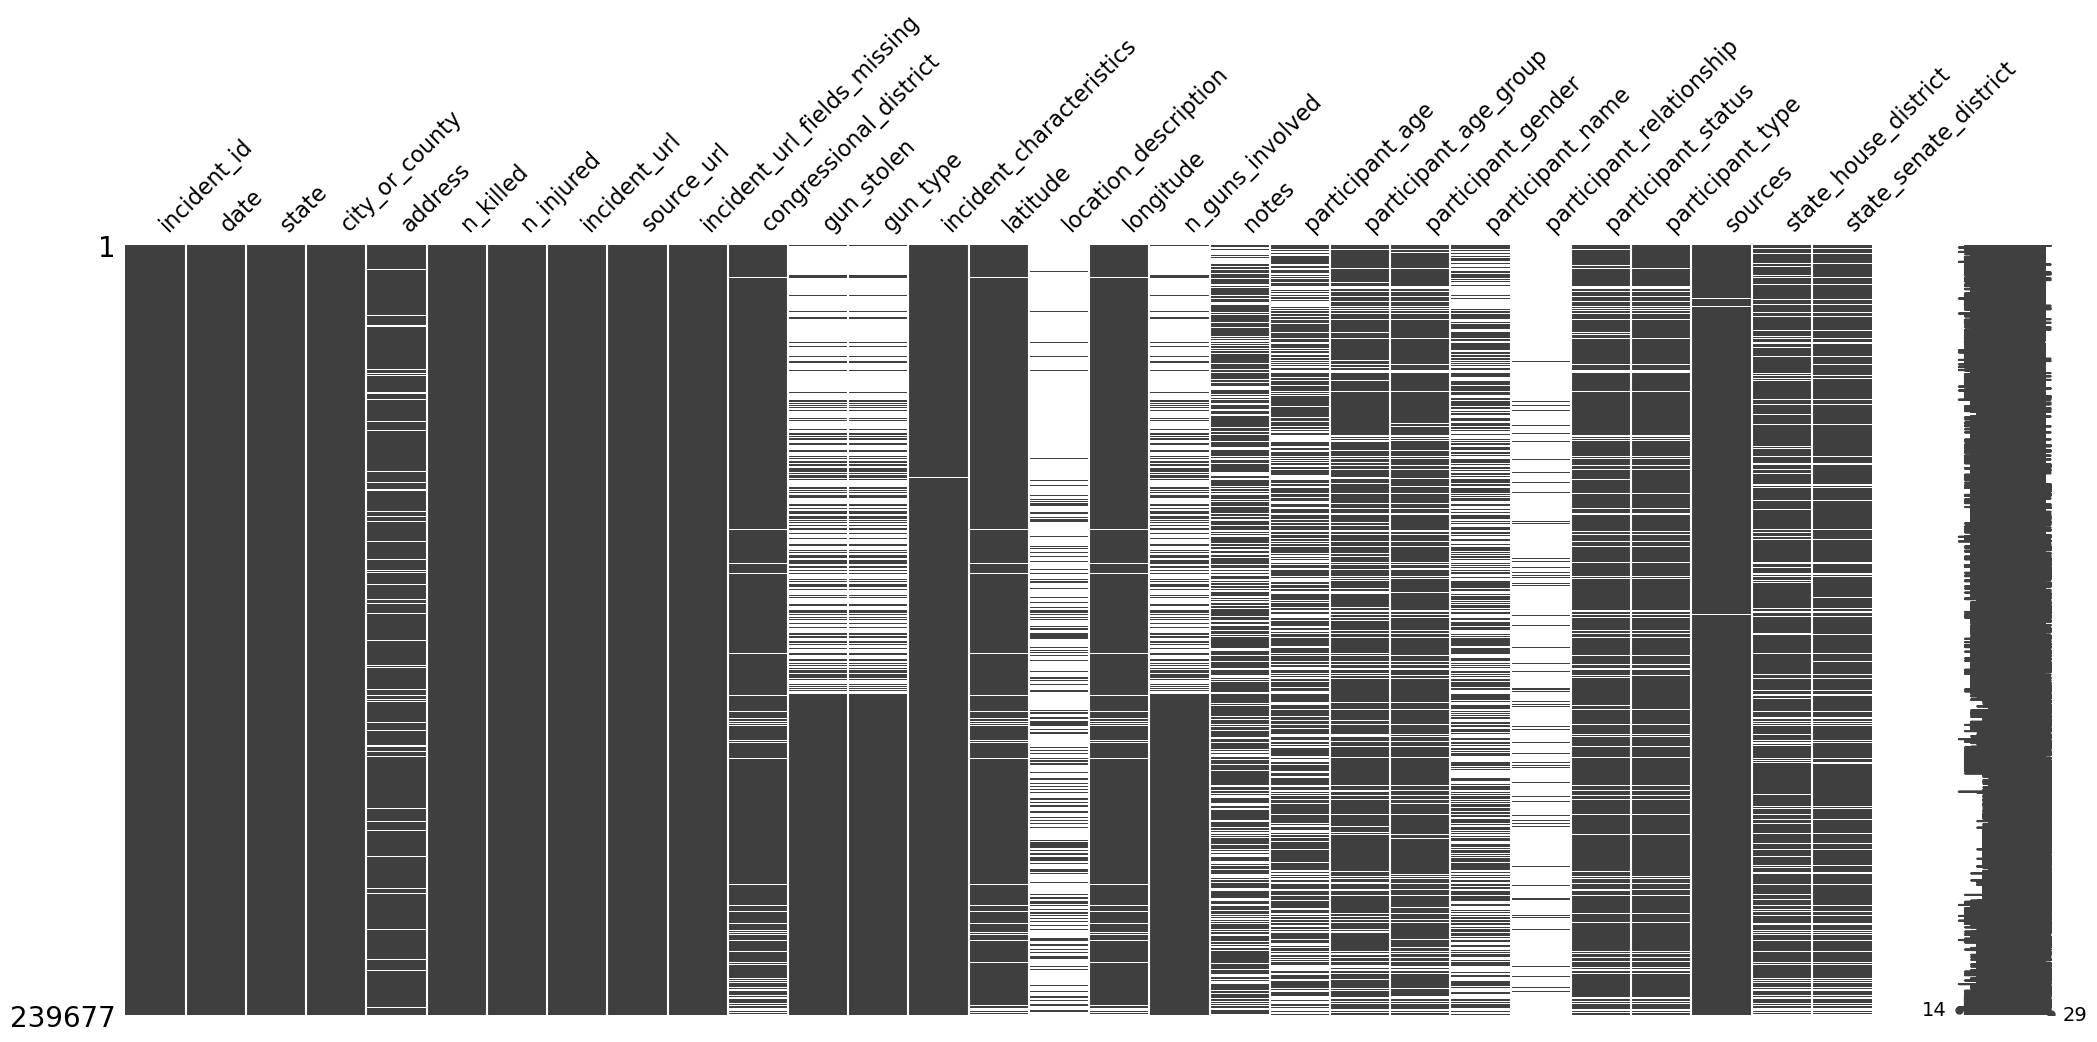

In [6]:
import missingno
missingno.matrix(data)

<Axes: >

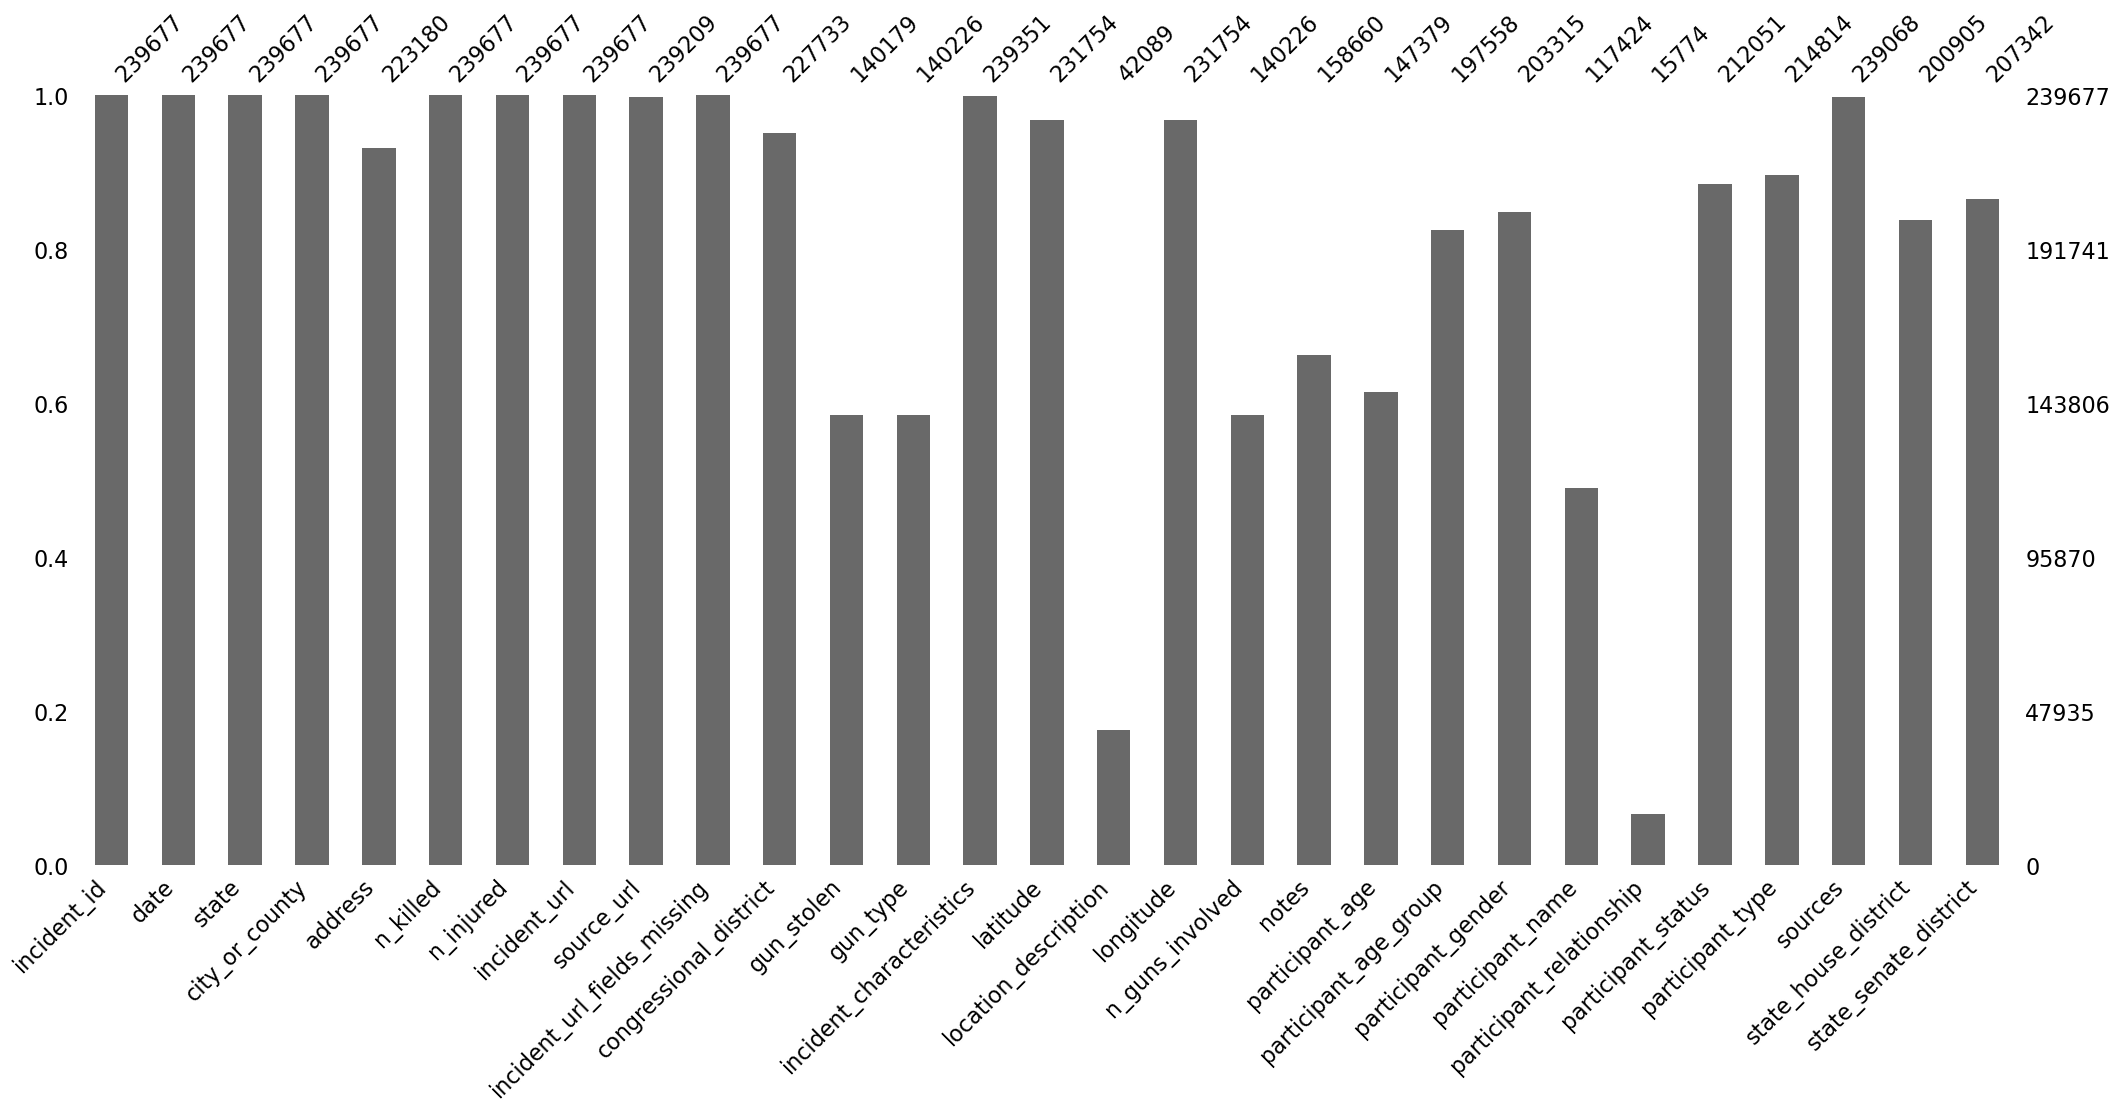

In [7]:
missingno.bar(data,labels=True)

## Data preparation

For the purpose of keeping this notebook simple, I am going to drop the all columns to the of n_injured.

In [8]:
data = data.iloc[:, :7]
data.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2


I am also going to drop incident_id, city_or_county and address column.

In [9]:
data.drop(columns = ['incident_id', 'city_or_county', 'address'], inplace = True)
data

,date,state,n_killed,n_injured
0,2013-01-01,Pennsylvania,0,4
1,2013-01-01,California,1,3
2,2013-01-01,Ohio,1,3
3,2013-01-05,Colorado,4,0
4,2013-01-07,North Carolina,2,2
...,...,...,...,...
239672,2018-03-31,Louisiana,0,0
239673,2018-03-31,Louisiana,1,0
239674,2018-03-31,Louisiana,0,1
239675,2018-03-31,Texas,1,0


In [10]:
data.loc[:, ["date", "state", "n_killed", "n_injured"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       239677 non-null  object
 1   state      239677 non-null  object
 2   n_killed   239677 non-null  int64 
 3   n_injured  239677 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 7.3+ MB


In [11]:
data["date"].dtype

dtype('O')

Now, create some new additional features.

In [12]:
#feature Engineering 
#feature Engineering with time series data 
# Import library for datetime
from datetime import datetime as dt

data['date'] = pd.to_datetime(data['date']) # convert date to datetime format
print(data['date'].dtype)

data['year'] = data['date'].dt.year # extract year
data['month'] = data['date'].dt.month # extract month
data['day'] = data['date'].dt.day # extract day
data['day_of_week'] = data['date'].dt.dayofweek # extract day of week
#____________________________________________________________________________________________________
#feature Engineering

data['total_victim'] = data['n_killed'] + data['n_injured'] # sum up number of deaths and injuries
data.head()

datetime64[ns]


,date,state,n_killed,n_injured,year,month,day,day_of_week,total_victim
0,2013-01-01,Pennsylvania,0,4,2013,1,1,1,4
1,2013-01-01,California,1,3,2013,1,1,1,4
2,2013-01-01,Ohio,1,3,2013,1,1,1,4
3,2013-01-05,Colorado,4,0,2013,1,5,5,4
4,2013-01-07,North Carolina,2,2,2013,1,7,0,4


In [15]:
# Replace numeric day of week values with text
data['day_of_week'] = data['day_of_week'].map({0: 'Monday', 1: 'Tuesday',
                                               2: 'Wednesday', 3: 'Thursday',
                                               4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
data.head()

,date,state,n_killed,n_injured,year,month,day,day_of_week,total_victim
0,2013-01-01,Pennsylvania,0,4,2013,1,1,Tuesday,4
1,2013-01-01,California,1,3,2013,1,1,Tuesday,4
2,2013-01-01,Ohio,1,3,2013,1,1,Tuesday,4
3,2013-01-05,Colorado,4,0,2013,1,5,Saturday,4
4,2013-01-07,North Carolina,2,2,2013,1,7,Monday,4


In [16]:
# Check for null values
data.isnull().sum()

date            0
state           0
n_killed        0
n_injured       0
year            0
month           0
day             0
day_of_week     0
total_victim    0
dtype: int64

In [17]:
data.shape

(239677, 9)

Our dataset is ready!

## Groupwise analysis

To group data using pandas, we use the [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) operation.

Recall value_counts function that we covered in last week's tutorial. We can replicate what that function does using groupby function.

Suppose we want to count the number of cases for each day of the week.

In [19]:
data['day_of_week'].value_counts()

day_of_week
Sunday       37052
Saturday     36096
Wednesday    34126
Monday       33760
Tuesday      33307
Friday       32775
Thursday     32561
Name: count, dtype: int64

We can also accomplish this via the groupby function.

In [30]:
# For count it wouldn't matter much which column we apply the function to because we are only counting the number of rows
# I have used the total_victim column column here
# The order is different here because in value counts it is sorted from highest to lowest but the numbers should be identical
#what is the count of the victims of gun violence for each day of the week? 

data.groupby('day_of_week')['total_victim'].count().sort_values(ascending=False)

day_of_week
Sunday       37052
Saturday     36096
Wednesday    34126
Monday       33760
Tuesday      33307
Friday       32775
Thursday     32561
Name: total_victim, dtype: int64

In [31]:
data.groupby("day_of_week")["total_victim"].sum().sort_values(ascending=False)

day_of_week
Sunday       31749
Saturday     30372
Monday       24547
Friday       23628
Wednesday    23276
Tuesday      23085
Thursday     22213
Name: total_victim, dtype: int64

There are other functions other than count that you can apply to a group. We have covered them in our tutorial last week, for example, sum, min, max, mean etc.

In [22]:
# What is the total number of victims of gun violence for each US state?
# We first group the number of victims by state then sum them all up

data.groupby('state')['total_victim'].sum().sort_values(ascending=False)

state
Illinois                16923
California              13206
Texas                   11152
Florida                 10981
Ohio                     8211
Pennsylvania             7451
North Carolina           6854
New York                 6764
Louisiana                6577
Georgia                  6512
Tennessee                6302
Missouri                 5721
Virginia                 5025
Alabama                  4878
Maryland                 4858
South Carolina           4694
Michigan                 4578
Indiana                  4564
New Jersey               3708
Mississippi              3059
Wisconsin                2979
Kentucky                 2960
Oklahoma                 2491
Arizona                  2190
Massachusetts            2173
Washington               2140
Arkansas                 2120
Colorado                 1929
District of Columbia     1874
Nevada                   1750
Connecticut              1599
Kansas                   1473
Minnesota                1377
Oreg

Suppose we would like to compute a bunch of different functions to group simultaneously. The way we do that is via the [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html) function.

Let's work out the average, minimum and maximum number of victims for each month.

In [23]:
data.groupby('month')['total_victim'].max().sort_values(ascending=False)

month
6     103
11     47
12     35
2      34
5      27
7      25
4      20
10     19
3      17
1      16
9      15
8      13
Name: total_victim, dtype: int64

In [24]:
# For mean we have to first import NumPy
import numpy as np

data.groupby('month')['total_victim'].agg([np.mean, min, max])

C:\Users\DELL\AppData\Local\Temp\ipykernel_7088\2085950301.py:4: FutureWarning: The provided callable <function mean at 0x000002237BD6B560> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data.groupby('month')['total_victim'].agg([np.mean, min, max])
C:\Users\DELL\AppData\Local\Temp\ipykernel_7088\2085950301.py:4: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  data.groupby('month')['total_victim'].agg([np.mean, min, max])
C:\Users\DELL\AppData\Local\Temp\ipykernel_7088\2085950301.py:4: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavi

,mean,min,max
month,,,
1,0.735395,0,16
2,0.709357,0,34
3,0.711837,0,17
4,0.713442,0,20
5,0.756347,0,27
6,0.782885,0,103
7,0.782685,0,25
8,0.757414,0,13
9,0.739978,0,15


## Sorting

We can sort a series in ascending or descending order via the [sort values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) function.

In [25]:
# Total number of victims in each state from highest to lowest 

data.groupby('state')['total_victim'].sum().sort_values(ascending = False)

# Comment: Illinois has the most number of victims from gun violence

state
Illinois                16923
California              13206
Texas                   11152
Florida                 10981
Ohio                     8211
Pennsylvania             7451
North Carolina           6854
New York                 6764
Louisiana                6577
Georgia                  6512
Tennessee                6302
Missouri                 5721
Virginia                 5025
Alabama                  4878
Maryland                 4858
South Carolina           4694
Michigan                 4578
Indiana                  4564
New Jersey               3708
Mississippi              3059
Wisconsin                2979
Kentucky                 2960
Oklahoma                 2491
Arizona                  2190
Massachusetts            2173
Washington               2140
Arkansas                 2120
Colorado                 1929
District of Columbia     1874
Nevada                   1750
Connecticut              1599
Kansas                   1473
Minnesota                1377
Oreg

In [26]:
# Number of gun violence cases in each month from lowest to highest

data.groupby(['state','month', 'day_of_week'])['total_victim'].sum().sort_values(ascending = False)
# Comment: November had the least number of cases while January had the most

state     month  day_of_week
Illinois  8      Sunday         382
          7      Sunday         372
          5      Saturday       315
          7      Saturday       314
          9      Saturday       301
                               ... 
Montana   8      Sunday           0
          7      Tuesday          0
Maine     7      Tuesday          0
Vermont   6      Thursday         0
Idaho     2      Friday           0
Name: total_victim, Length: 4280, dtype: int64